# **Time Series Analysis for Daily Delhi Climate**

- This notebook performs time series analysis Daily Delhi Climate.  
- We will explore the data, visualize trends, and prepare it for modeling.

**Step 0: Import required libraries and load data.**
- We load essential Python libraries for data analysis and visualization:
- `pandas` for handling time series data
- `matplotlib` and `seaborn` for visualizations.
- We load both the training and testing datasets and combine them into one unified DataFrame (`df`) for Exploratory Data Analysis (EDA). We also set the `date` column as the index since this is a time series dataset.

In [ ]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context('notebook')

# Load the training and testing datasets
df_train = pd.read_csv('/content/DailyDelhiClimateTrain.csv', parse_dates=['date'])
df_test = pd.read_csv('/content/DailyDelhiClimateTest.csv', parse_dates=['date'])

# Combine datasets for EDA
df = pd.concat([df_train, df_test], ignore_index=True)
df.set_index('date', inplace=True)


**Step 1: Descriptive statistics**
- Is a summary statistic that quantitatively describes or summarizes features from a collection of structured data according to [1].
-Summarize the central tendency, dispersion, and shape of a dataset’s distribution.

We use `.describe()` to calculate key statistics such as:
- **count**: Number of non-null observations
- **mean**: Average value
- **std**: Standard deviation (spread)
- **min/max**: Smallest and largest values
- **25% / 50% / 75%**: Quartiles

In [ ]:
# Step 1: Descriptive Statistics

# Display basic statistics for each numerical column
descriptive_stats = df.describe()
print("Descriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
           meantemp     humidity   wind_speed  meanpressure
count  1576.000000  1576.000000  1576.000000   1576.000000
mean     25.221918    60.445229     6.899262   1010.593178
std       7.345014    16.979994     4.510725    175.242704
min       6.000000    13.428571     0.000000     -3.041667
25%      18.500000    49.750000     3.700000   1001.875000
50%      27.166667    62.440476     6.363571   1009.055556
75%      31.142857    72.125000     9.262500   1015.200000
max      38.714286   100.000000    42.220000   7679.333333


**Step 2: Time Plot**

Each subplot shows the trend of one climate variable over time:

- **Mean Temperature**: Shows daily temperature patterns and possible seasonal cycles.
- **Humidity**: Indicates how moist the air is over time.
- **Wind Speed**: Helps understand wind patterns and potential anomalies.
- **Mean Pressure**: Useful for understanding weather system changes.

Each graph is labeled with units and axes for clarity.

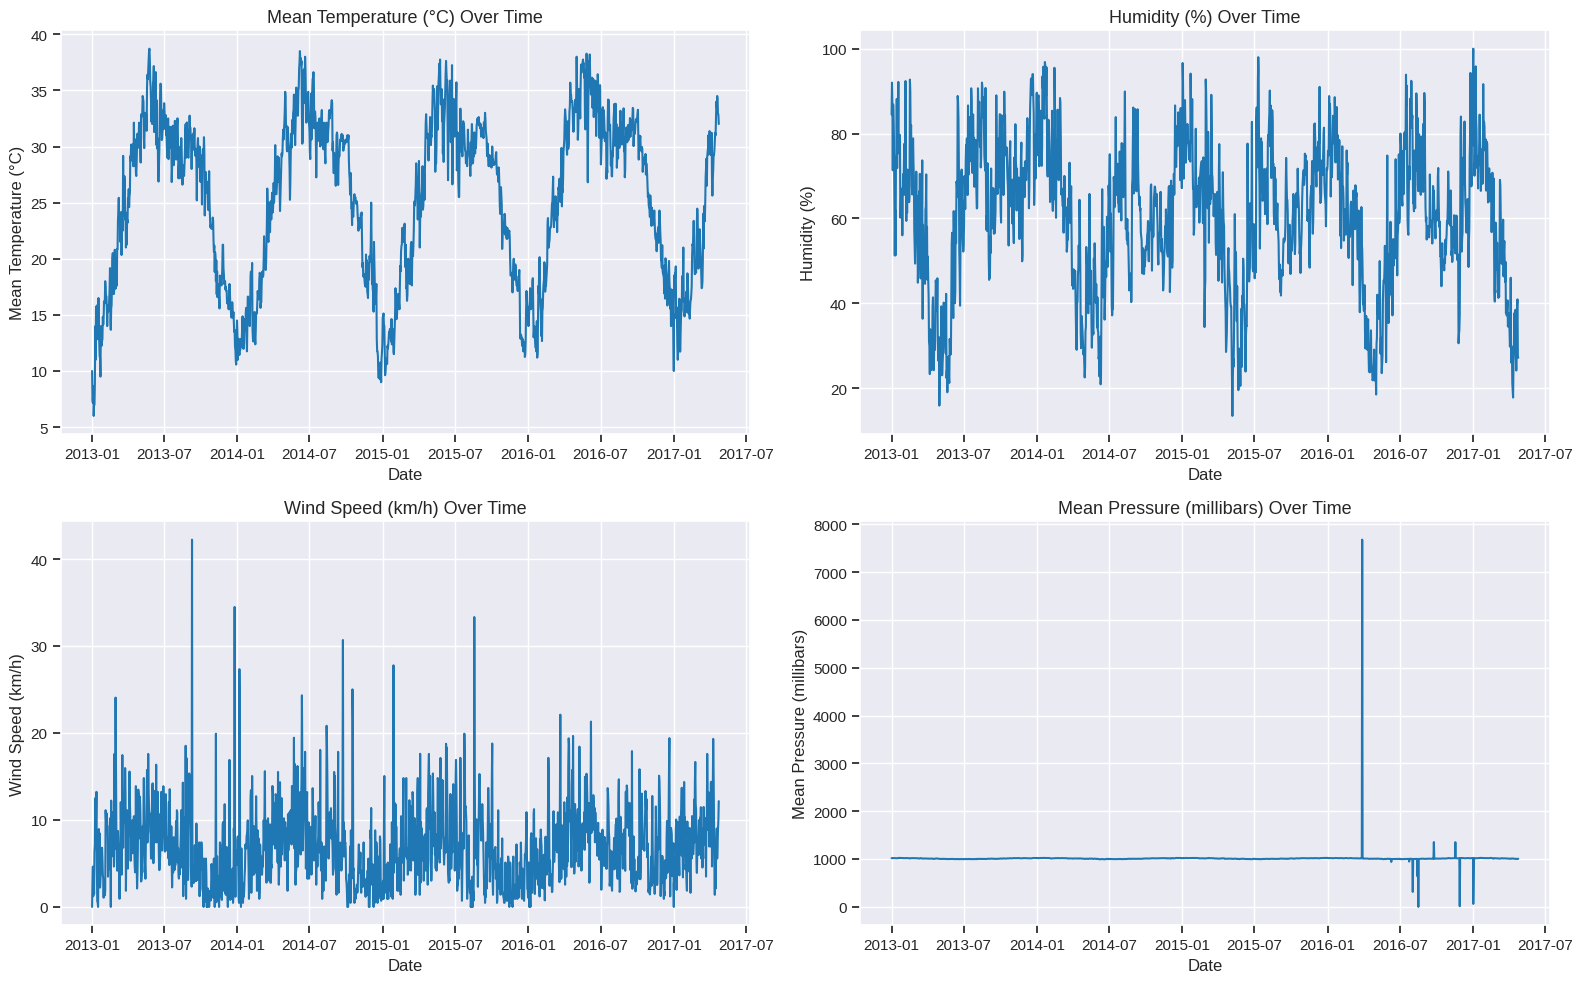

In [ ]:
#  Time Plot

climate_vars = {
    'meantemp': 'Mean Temperature (°C)',
    'humidity': 'Humidity (%)',
    'wind_speed': 'Wind Speed (km/h)',
    'meanpressure': 'Mean Pressure (millibars)'
}

plt.figure(figsize=(16, 10))

for i, (var, label) in enumerate(climate_vars.items(), start=1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    plt.plot(df.index, df[var], label=label, color='tab:blue')
    plt.title(f'{label} Over Time', fontsize=13)
    plt.xlabel('Date')
    plt.ylabel(label)
    plt.grid(True)

plt.tight_layout()
plt.show()


**Step 3: Seasonal Plots**

**3.1. Yearly Trends: Average Annual Values for Climate Variables**

These plots show the **average value per year** for each climate variable. They help us analyze long-term trends:

- **Mean Temperature (°C)**: Helps detect warming or cooling over years.
- **Humidity (%)**: Indicates whether Delhi is getting more humid or drier.
- **Wind Speed (km/h)**: Tracks changes in wind intensity.
- **Mean Pressure (millibars)**: May signal shifts in atmospheric patterns or pressure systems.

Together, these yearly trends help assess **climate change patterns** or anomalies in the region.


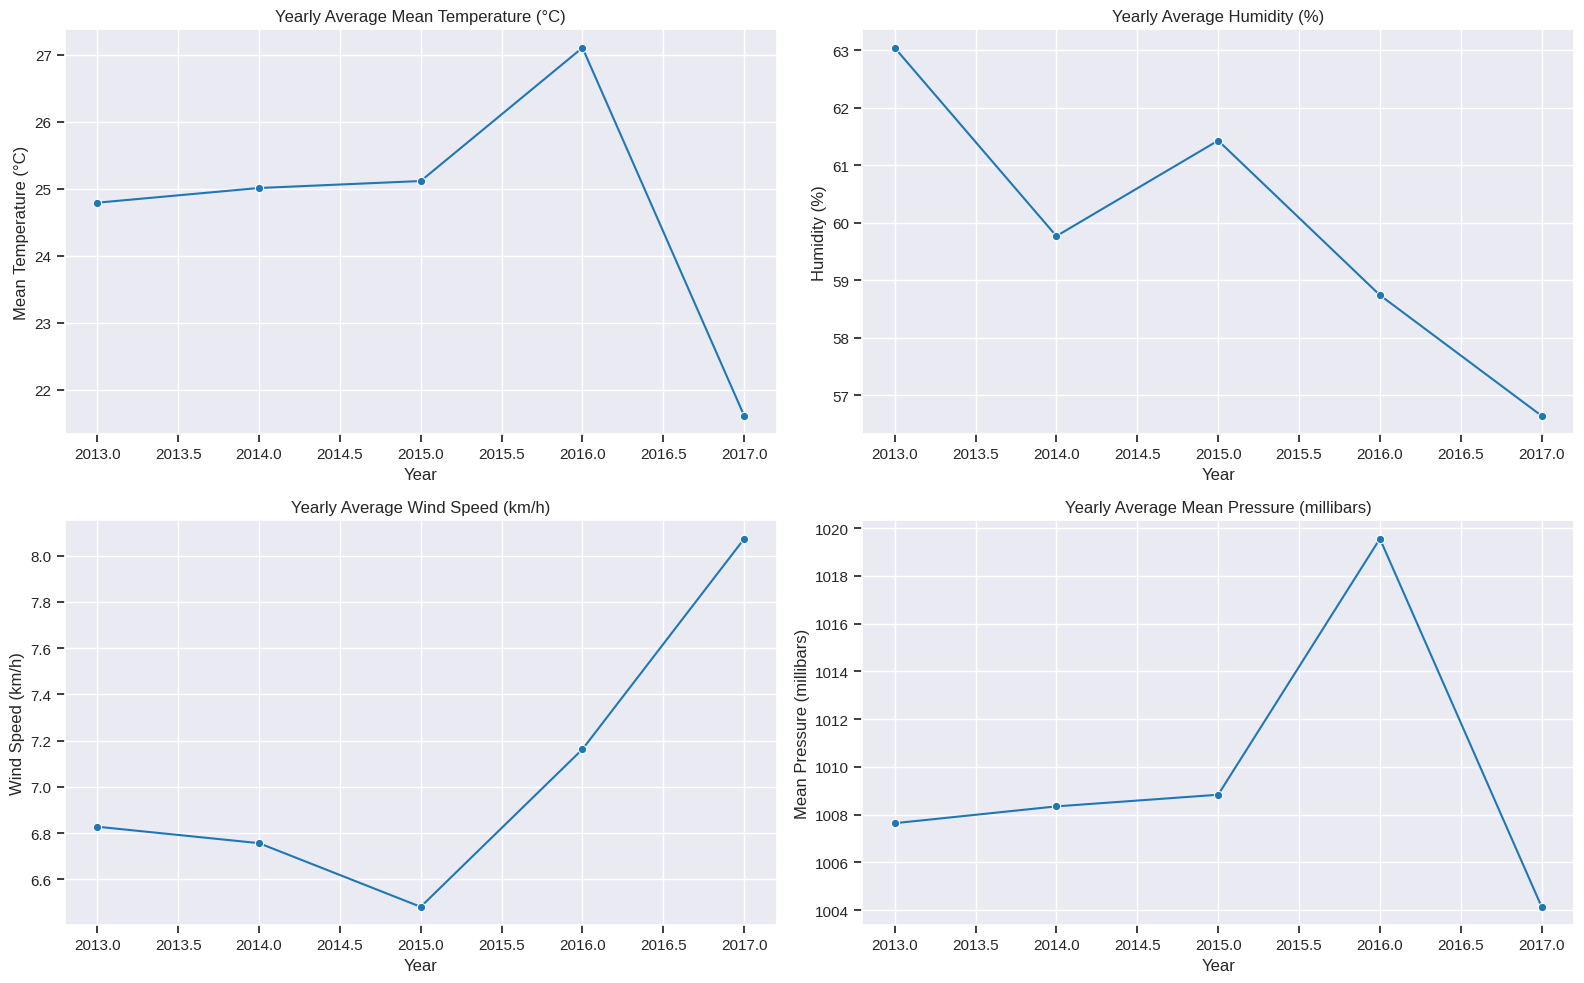

In [ ]:
df['year'] = df.index.year

# Yearly Trend Plots: Annual Averages for All Climate Variables
plt.figure(figsize=(16, 10))

for i, (var, label) in enumerate(climate_vars.items(), start=1):
    yearly_avg = df.groupby('year')[var].mean()
    plt.subplot(2, 2, i)
    sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker='o', color='tab:blue')
    plt.title(f'Yearly Average {label}')
    plt.xlabel('Year')
    plt.ylabel(label)
    plt.grid(True)

plt.tight_layout()
plt.show()



**3.2. Monthly Trends for All Variables**

These plots show how each climate variable behaves across the months for each year:

- **Mean Temperature (°C)**: Highlights clear seasonal temperature changes.
- **Humidity (%)**: Reveals humidity cycles, often higher in monsoon seasons.
- **Wind Speed (km/h)**: May show seasonal winds or calm periods.
- **Mean Pressure (millibars)**: Indicates shifts in atmospheric conditions over the year.

This visualization helps us understand **seasonal consistency or variation** across years.


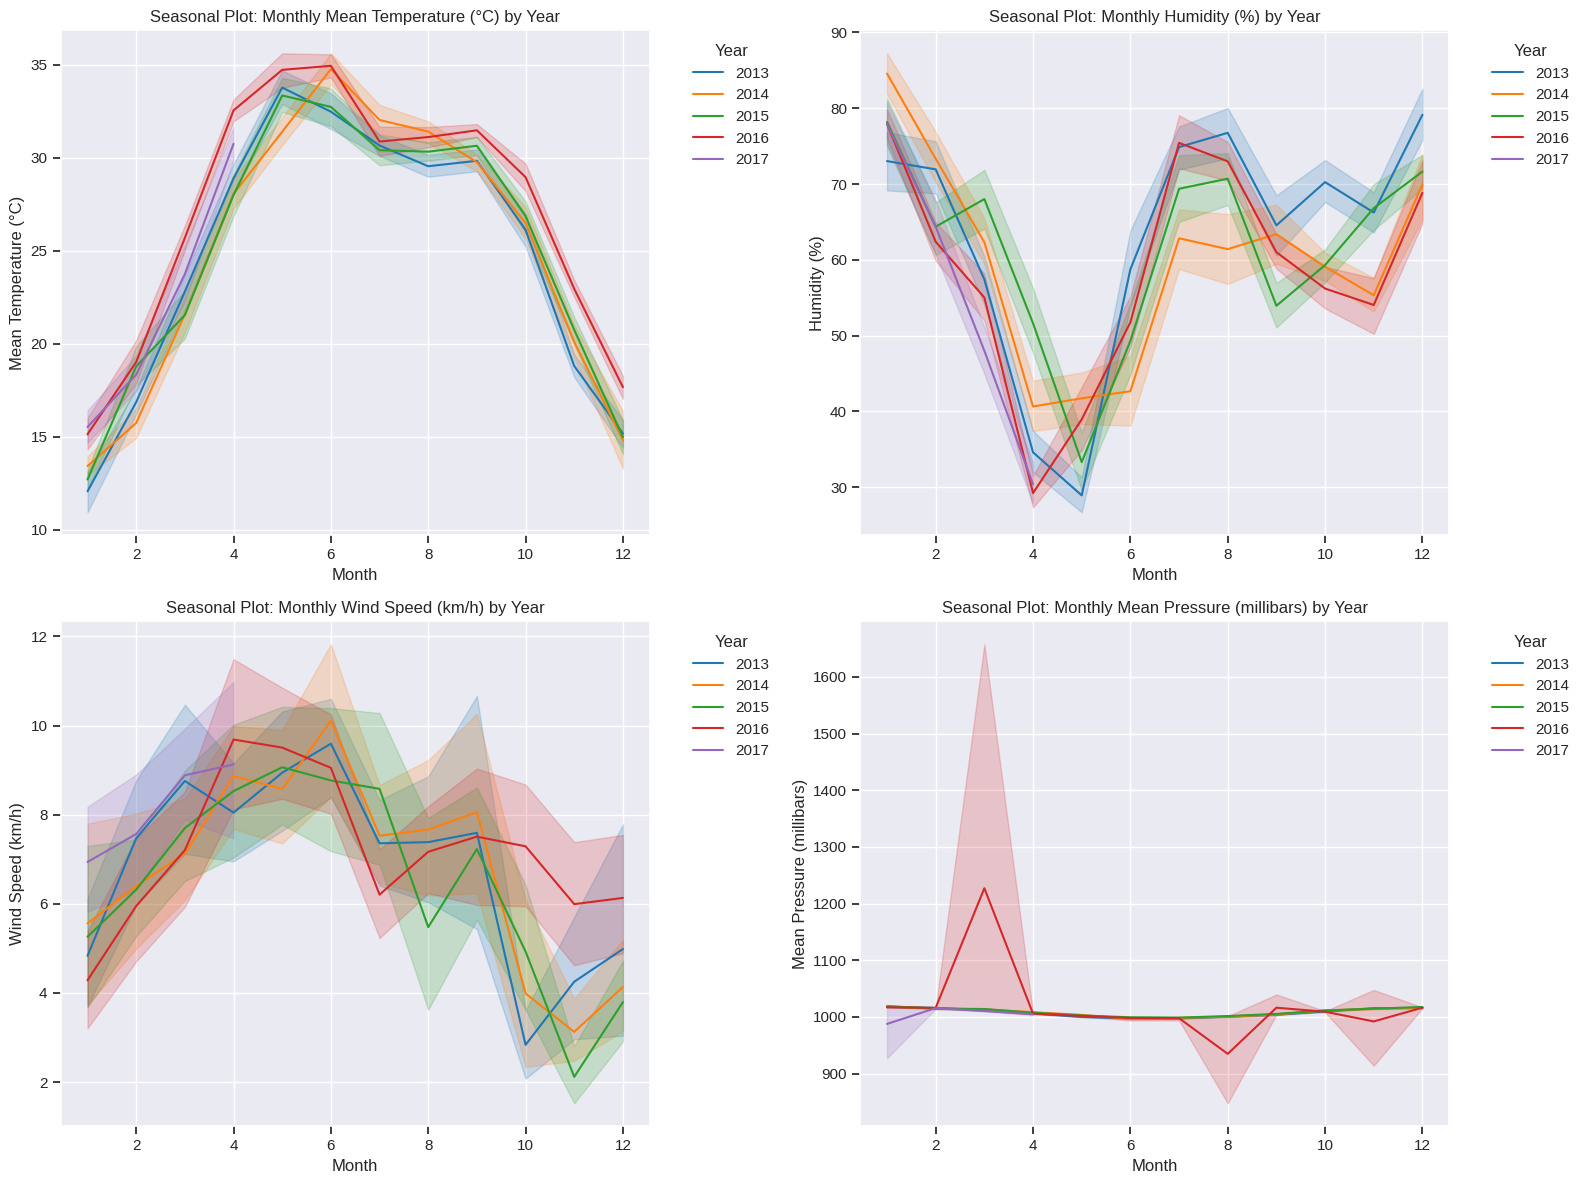

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year

# Monthly Seasonal Plots for All Climate Variables
climate_vars = {
    'meantemp': 'Mean Temperature (°C)',
    'humidity': 'Humidity (%)',
    'wind_speed': 'Wind Speed (km/h)',
    'meanpressure': 'Mean Pressure (millibars)'
}

plt.figure(figsize=(16, 12))

for i, (var, label) in enumerate(climate_vars.items(), start=1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df, x='month', y=var, hue='year', palette='tab10')
    plt.title(f'Seasonal Plot: Monthly {label} by Year')
    plt.xlabel('Month')
    plt.ylabel(label)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()


**Weekly Seasonal Plot by Day of the Week**

This seasonal plot helps us explore how the mean temperature varies across the days of the week, and how these patterns differ by year. This is useful to detect any systematic changes that may happen across weekdays or weekends.

We first ensured that the `date` column was set as the datetime index, then extracted the weekday name from that index. The days were ordered from Monday to Sunday for clearer visualization.

We used the `groupby` method to calculate the average mean temperature for each day of the week per year. To suppress future warnings related to categorical grouping in pandas, we included the parameter `observed=True` in our groupby function.

- Temperature patterns appear relatively stable across weekdays.



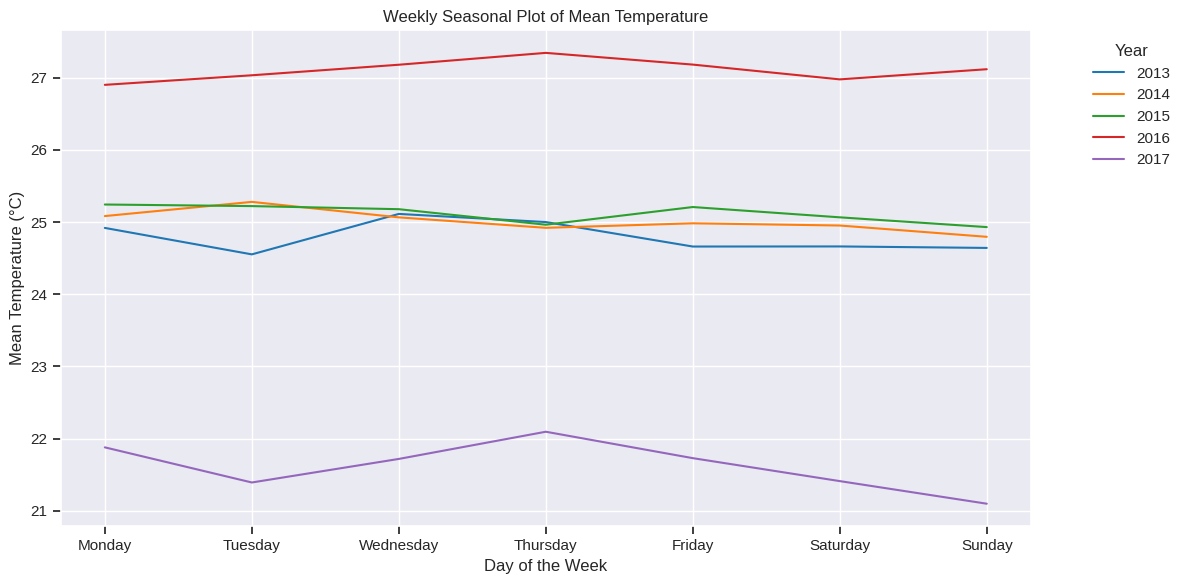

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['year'] = df.index.year
df['weekday_name'] = df.index.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday_name'] = pd.Categorical(df['weekday_name'], categories=weekday_order, ordered=True)

# Group by year and weekday for mean temperature
weekly_avg = df.groupby(['year', 'weekday_name'], observed=False)['meantemp'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_avg, x='weekday_name', y='meantemp', hue='year', palette='tab10')
plt.title('Weekly Seasonal Plot of Mean Temperature')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Temperature (°C)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



**Step 4: Box Plots**

**4.1 Monthly Box Plots of Climate Variables**

These box plots show the **distribution of each climate variable across the months** of the year.  
Each box represents the **interquartile range (IQR)**, the line inside shows the **median**, and outliers are marked as points.

What They Tell Us:
- **Mean Temperature**: Seasonal highs in summer (May–June) and lows in winter (Dec–Jan).
- **Humidity**: Likely peaks during the monsoon months (July–August).
- **Wind Speed**: Can reveal months with high or variable wind activity.
- **Mean Pressure**: Highlights consistent vs. fluctuating atmospheric pressure.

These plots help us see **seasonal variability and detect outliers or anomalies**.


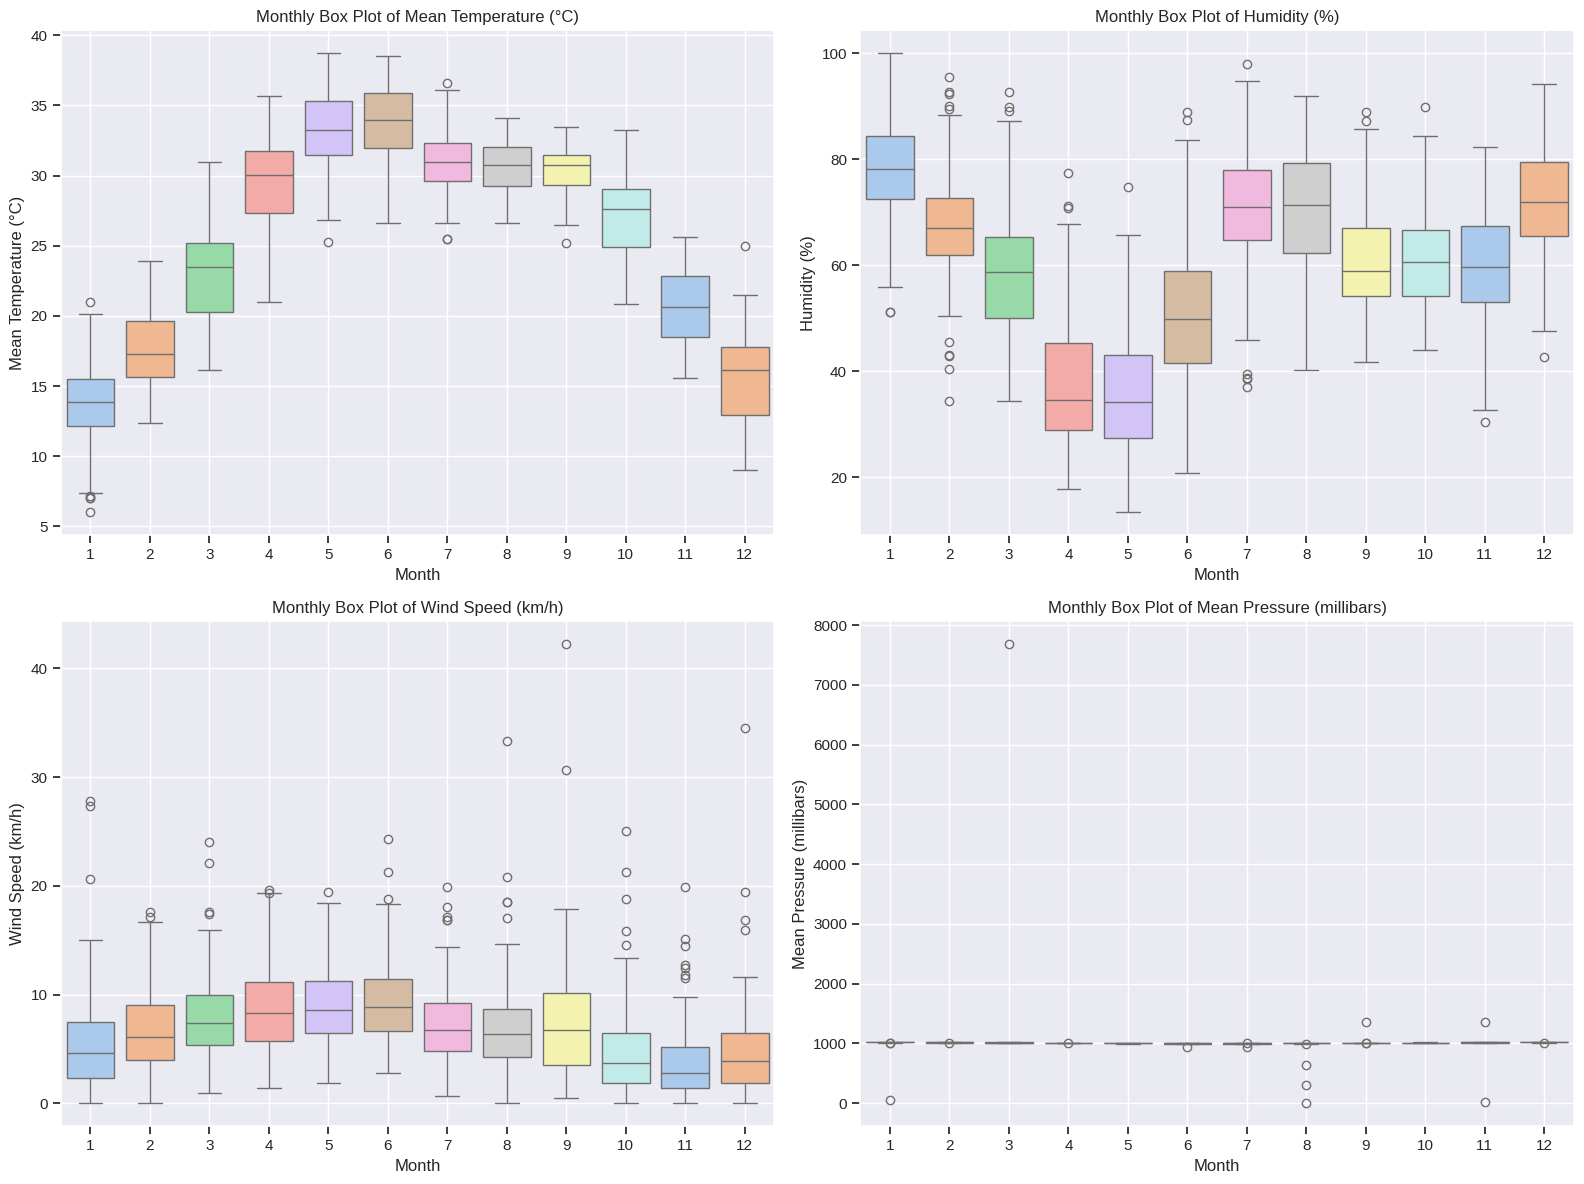

In [ ]:
# Step 4: Monthly Box Plots

df['month'] = df.index.month

plt.figure(figsize=(16, 12))

for i, (var, label) in enumerate(climate_vars.items(), start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='month', y=var, hue='month', palette='pastel', legend=False)
    plt.title(f'Monthly Box Plot of {label}')
    plt.xlabel('Month')
    plt.ylabel(label)
    plt.grid(True)

plt.tight_layout()
plt.show()


**4.2 Yearly Box Plots**

These box plots show the distribution of each climate variable across different **years**.  
They help identify:
- Changes in average levels over time.
- Outliers or extreme values.
- Variability within each year.

Useful for detecting **long-term changes** or unusual behavior in the data.


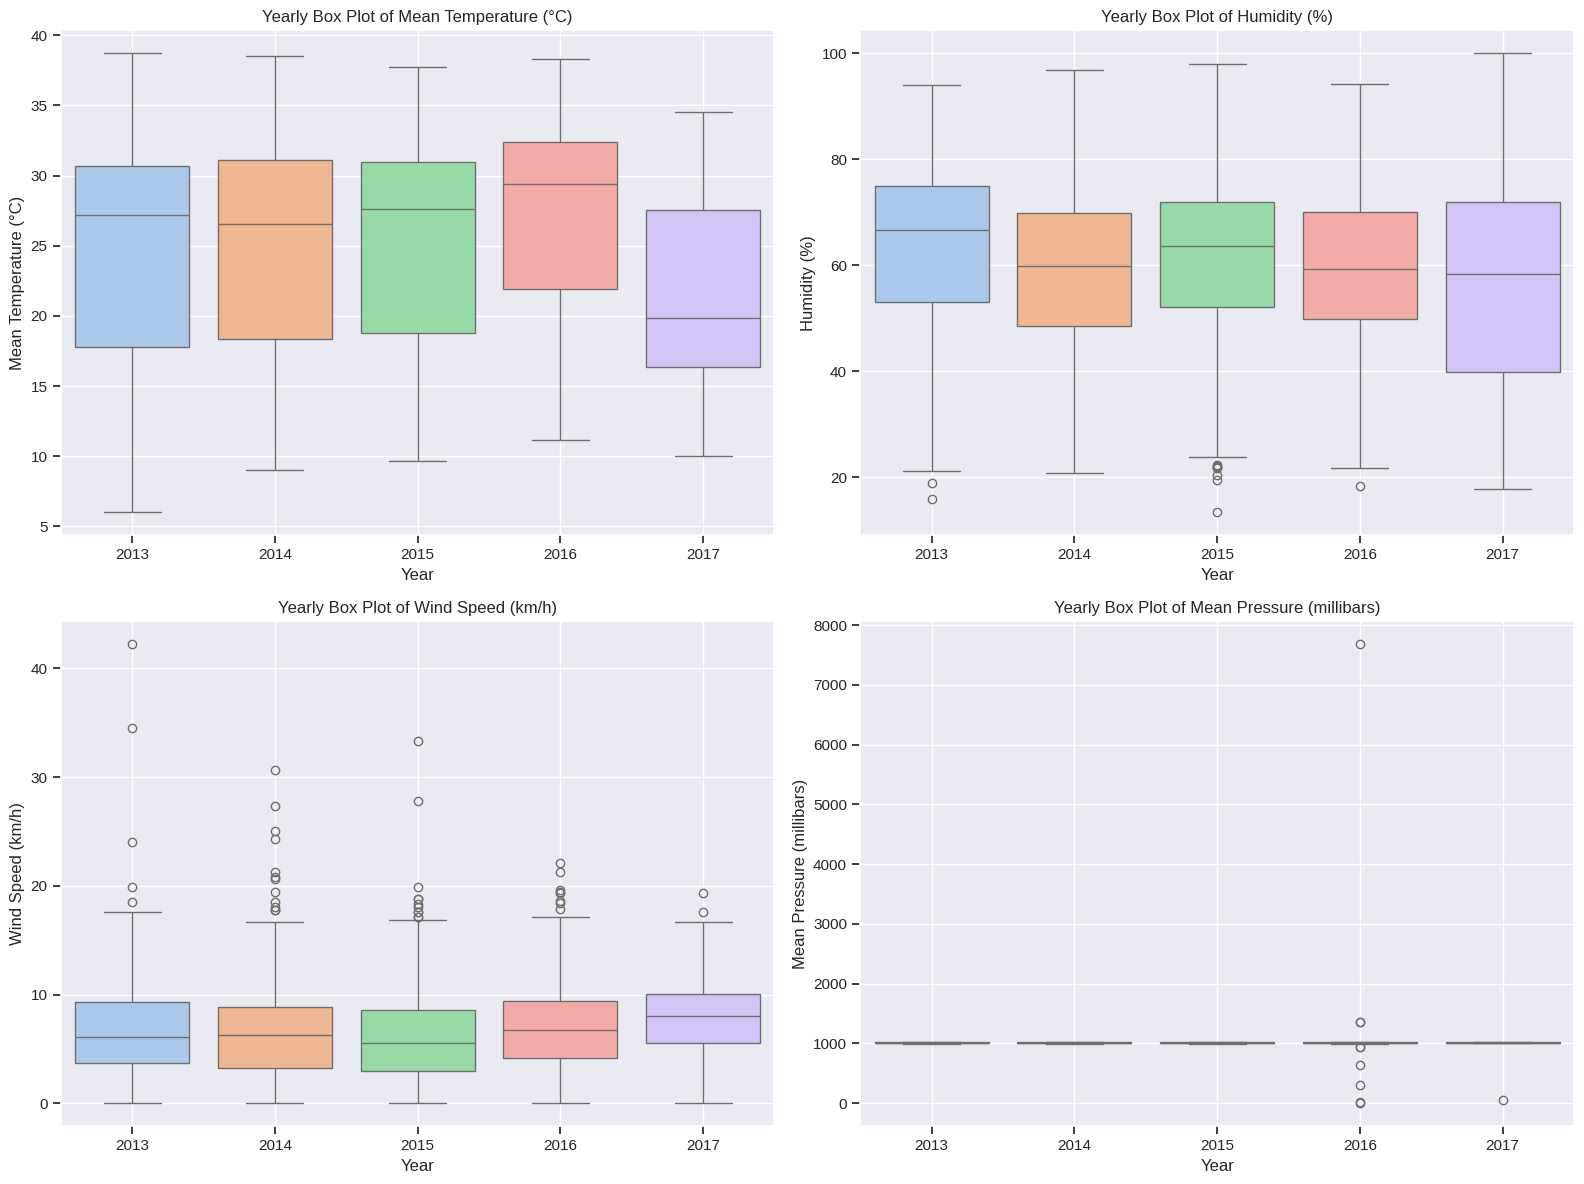

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'year' column exists
df['year'] = df.index.year

# Climate variable labels
climate_vars = {
    'meantemp': 'Mean Temperature (°C)',
    'humidity': 'Humidity (%)',
    'wind_speed': 'Wind Speed (km/h)',
    'meanpressure': 'Mean Pressure (millibars)'
}

# Create box plots
plt.figure(figsize=(16, 12))

for i, (var, label) in enumerate(climate_vars.items(), start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='year', y=var, hue='year', palette='pastel', legend=False)
    plt.title(f'Yearly Box Plot of {label}')
    plt.xlabel('Year')
    plt.ylabel(label)
    plt.grid(True)

plt.tight_layout()
plt.show()



**Step 5: Time Series Decomposition (All Climate Variables)**

According to [1], there are two main type of decomposition: additive and multiplicative.
 We applied **additive decomposition** to break each climate variable into:
- **Trend**: Long-term direction
- **Seasonality**: Repeating patterns (assumed yearly here, so period=365)
- **Residual**: Random noise or error

This helps in understanding the underlying structure before applying forecasting models.



Decomposing: Mean Temperature (°C)


<Figure size 1400x1000 with 0 Axes>

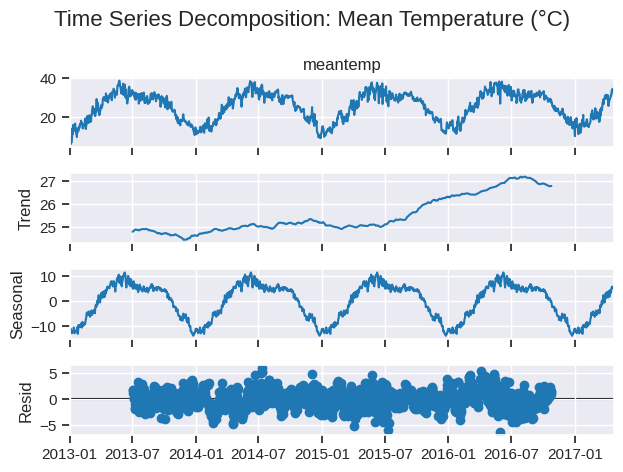


Decomposing: Humidity (%)


<Figure size 1400x1000 with 0 Axes>

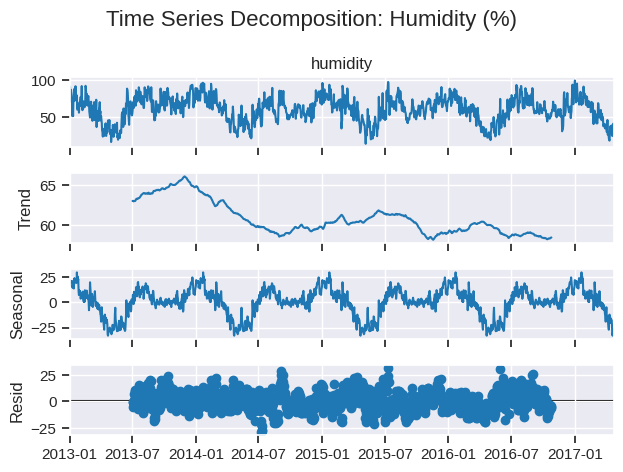


Decomposing: Wind Speed (km/h)


<Figure size 1400x1000 with 0 Axes>

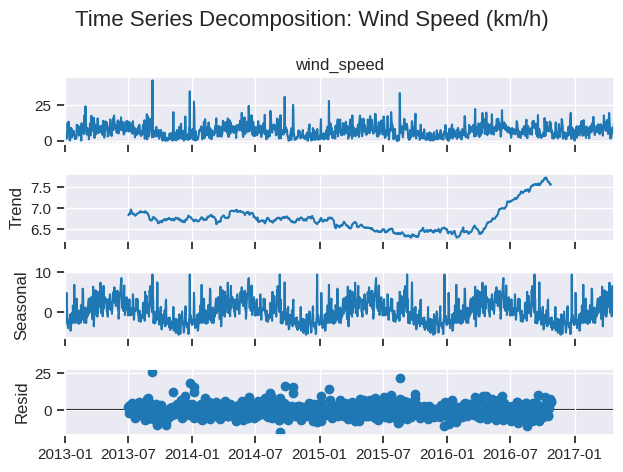


Decomposing: Mean Pressure (millibars)


<Figure size 1400x1000 with 0 Axes>

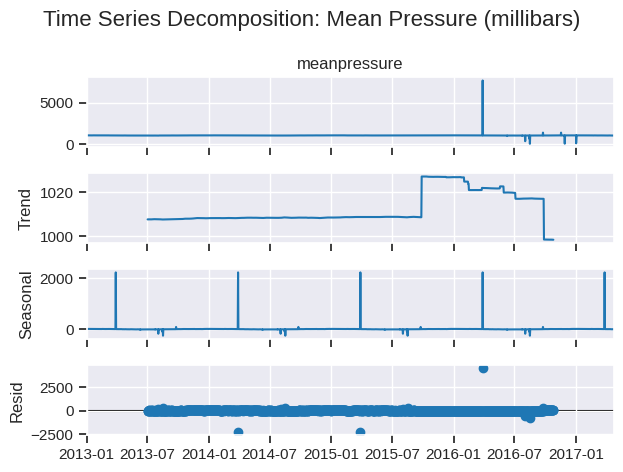

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Climate variables and labels
climate_vars = {
    'meantemp': 'Mean Temperature (°C)',
    'humidity': 'Humidity (%)',
    'wind_speed': 'Wind Speed (km/h)',
    'meanpressure': 'Mean Pressure (millibars)'
}

# Loop through each variable and decompose
for var, label in climate_vars.items():
    print(f"\nDecomposing: {label}")

    # Decompose the series
    decomposition = seasonal_decompose(df[var], model='additive', period=365)

    # Plot the decomposition
    plt.figure(figsize=(14, 10))
    decomposition.plot()
    plt.suptitle(f'Time Series Decomposition: {label}', fontsize=16)
    plt.tight_layout()
    plt.show()



**5.2 Multiplicative Time Series Decomposition (All Variables)**

We decompose the daily time series data for the following variables using a **multiplicative model**:

- Mean Temperature
- Humidity
- Wind Speed
- Mean Pressure

The multiplicative model assumes:
``Observed = Trend × Seasonal × Residual``

This is ideal when seasonal fluctuations **scale with the level of the series** (e.g., higher humidity levels in rainy seasons).

Each decomposition plot displays:
- The **original series**
- The **trend** component
- The **seasonal** component (yearly seasonality)
- The **residual** (random noise)



 Decomposing: meantemp



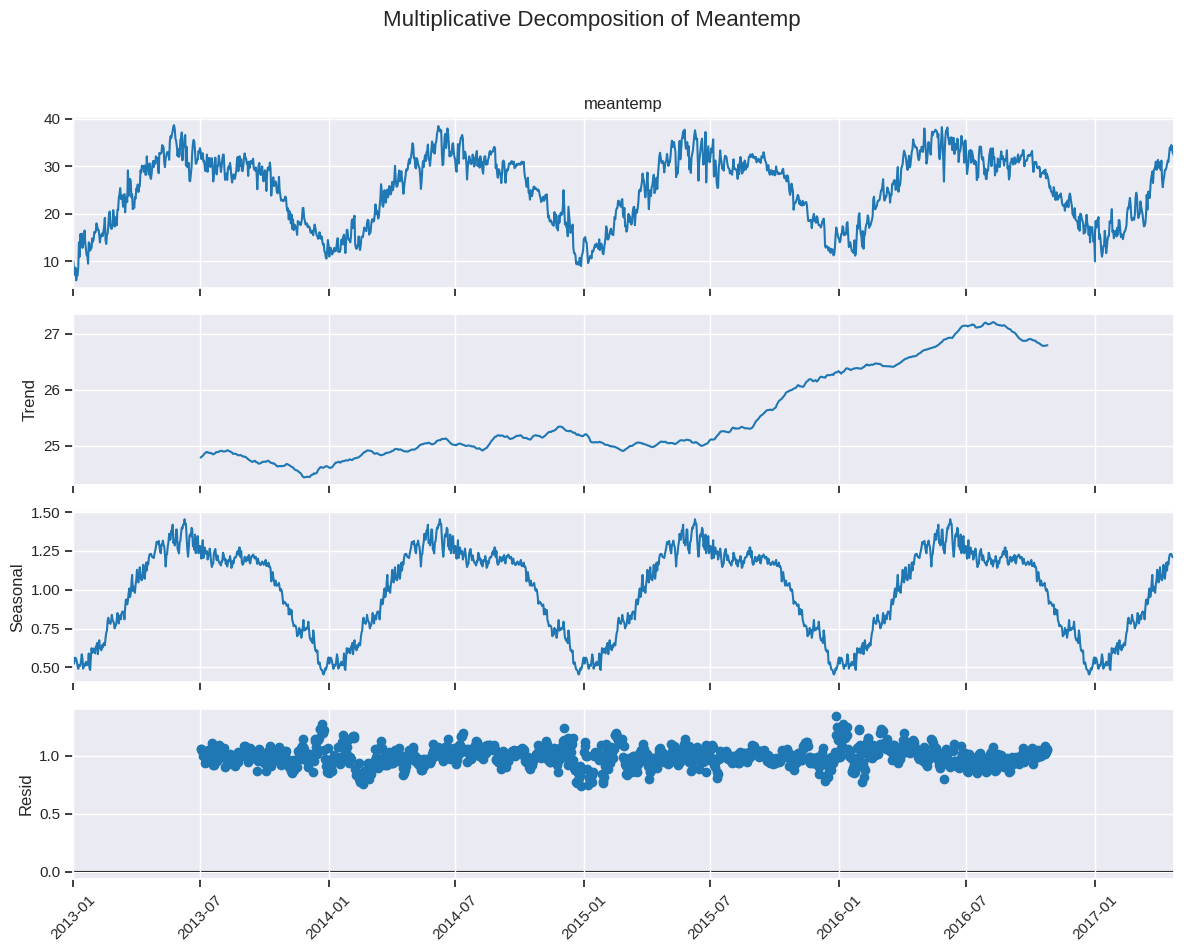


 Decomposing: humidity



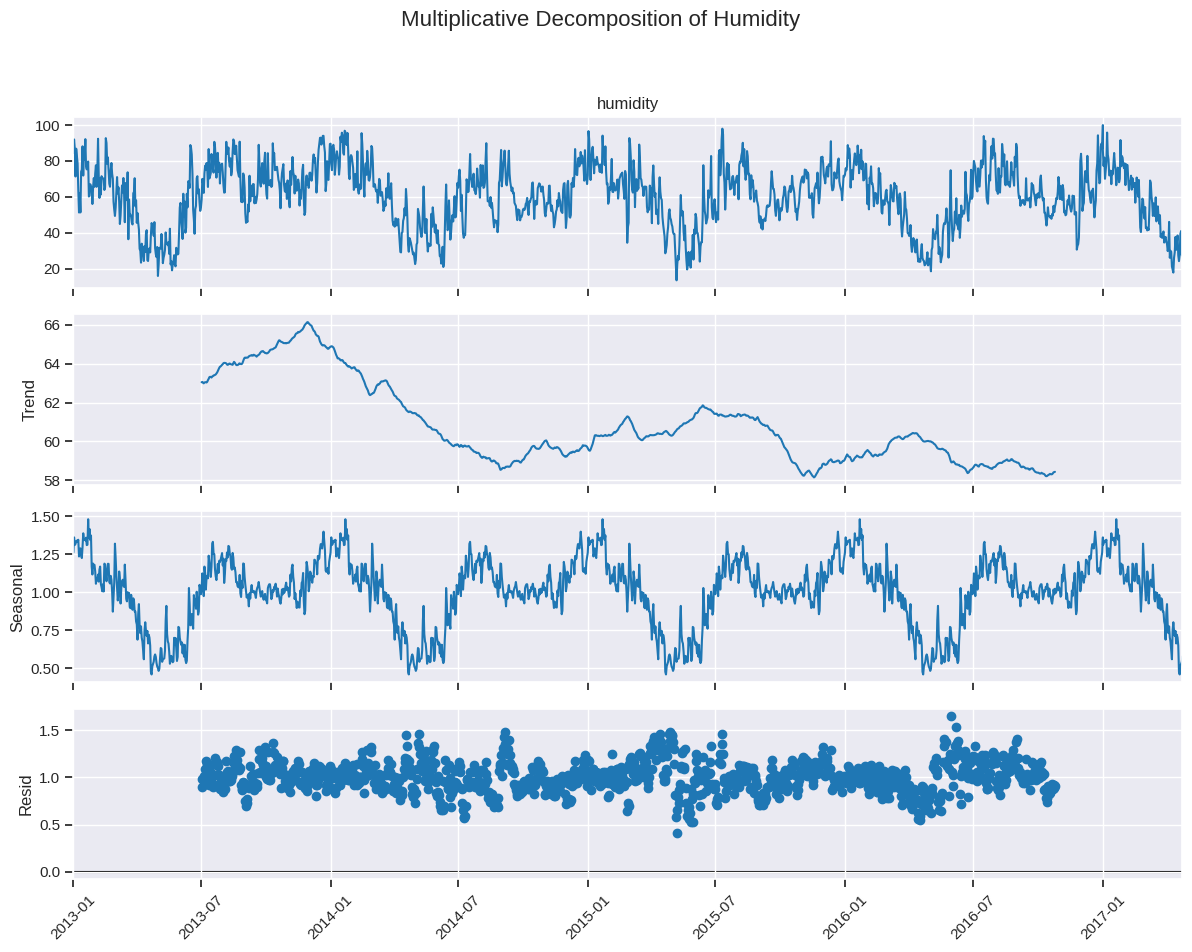


 Decomposing: wind_speed

 Could not decompose wind_speed: Multiplicative seasonality is not appropriate for zero and negative values

 Decomposing: meanpressure

 Could not decompose meanpressure: Multiplicative seasonality is not appropriate for zero and negative values


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure the index is datetime and sorted
df = df.sort_index()
df.index = pd.to_datetime(df.index)

# List of columns to decompose
columns_to_decompose = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Set period for daily data (1 year = 365 days)
period = 365

# Loop through each column and plot its decomposition
for col in columns_to_decompose:
    print(f'\n Decomposing: {col}\n')
    try:
        result = seasonal_decompose(df[col], model='multiplicative', period=period)

        plt.rcParams.update({'figure.figsize': (12, 10)})
        fig = result.plot()
        plt.suptitle(f'Multiplicative Decomposition of {col.capitalize()}', fontsize=16)

        # Apply date formatting to all x-axes
        for ax in fig.axes:
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            ax.tick_params(axis='x', rotation=45)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    except Exception as e:
        print(f" Could not decompose {col}: {e}")


**Step 6: Lag Analysis**

Lag analysis helps identify the dependency of current values on past values.

- **Lag Plot**: Displays a scatter plot of the time series against its lagged version. Patterns indicate possible autocorrelation.
- **ACF (Autocorrelation Function)**: Shows how correlated a variable is with its own lags (up to 50 in this case).Lag analysis is based on computing correlations between the series and a lagged version of the series itself, this is also called autocorrelation according to [1].
- **Partial Autocorrelation Function (PACF)**: Measures the correlation between the variable and its lagged values, after removing the effects of shorter lags.

We perform this analysis for all four time series variables:

Meantemp (Temperature)

Humidity

Wind Speed

Mean Pressure

These plots are especially important when determining the number of lags (p, q) to use in models such as AR, MA, ARIMA, SARIMAX, VAR, and VARMA.

Each variable is shown with a Lag Plot, ACF, and PACF to support model configuration and insight into temporal structure.


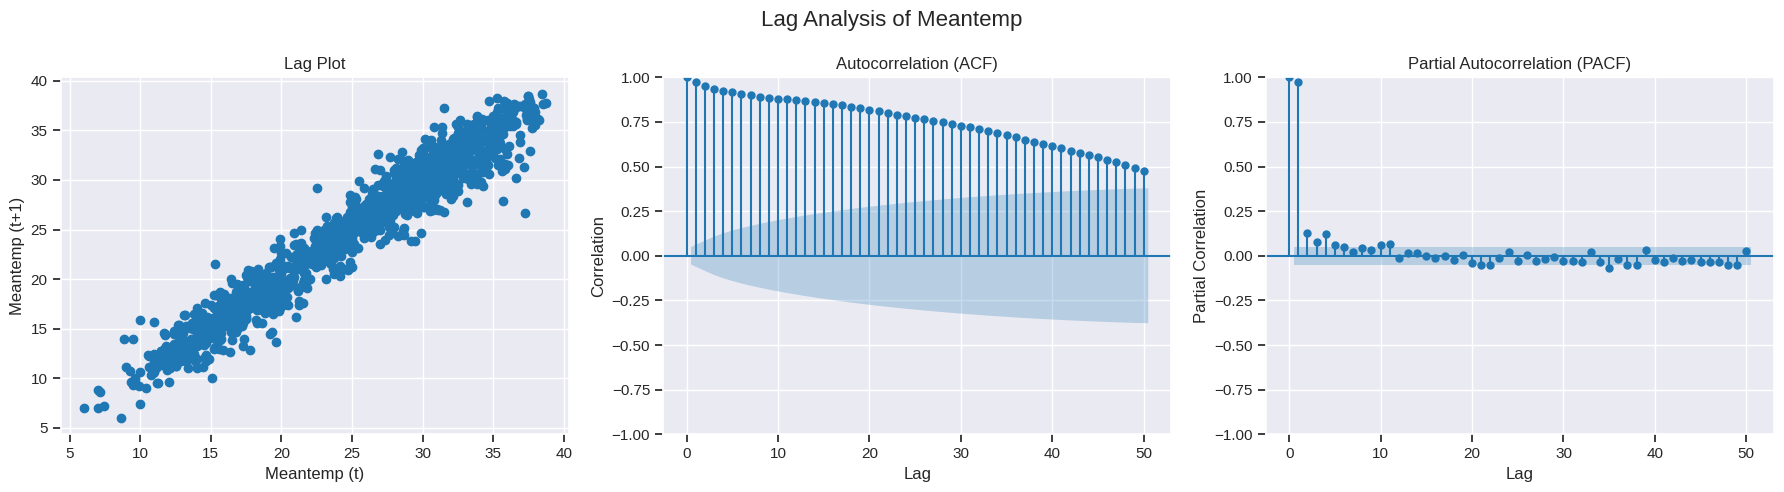

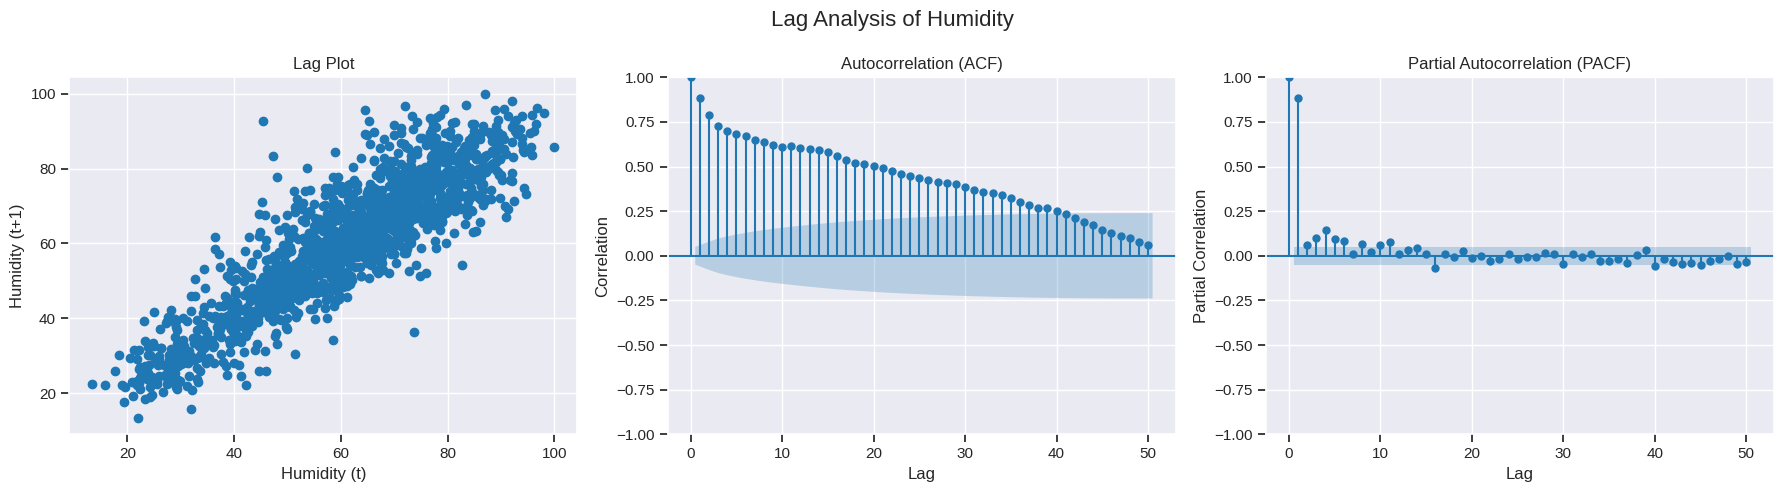

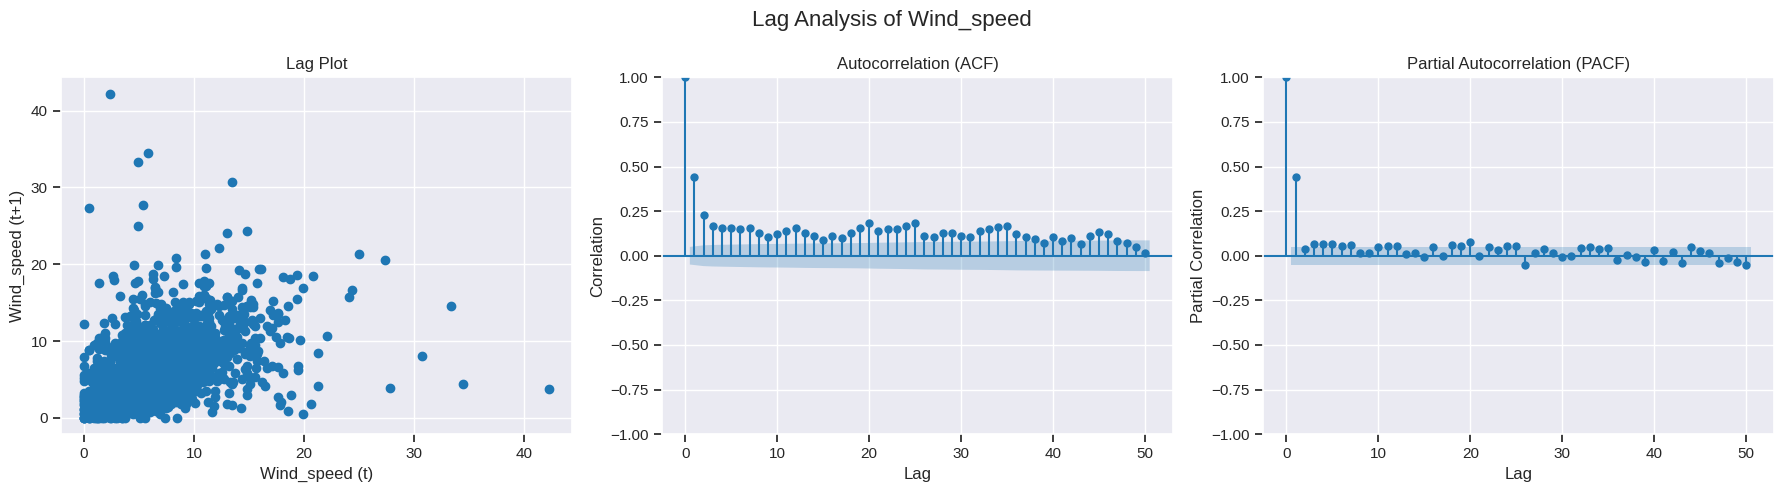

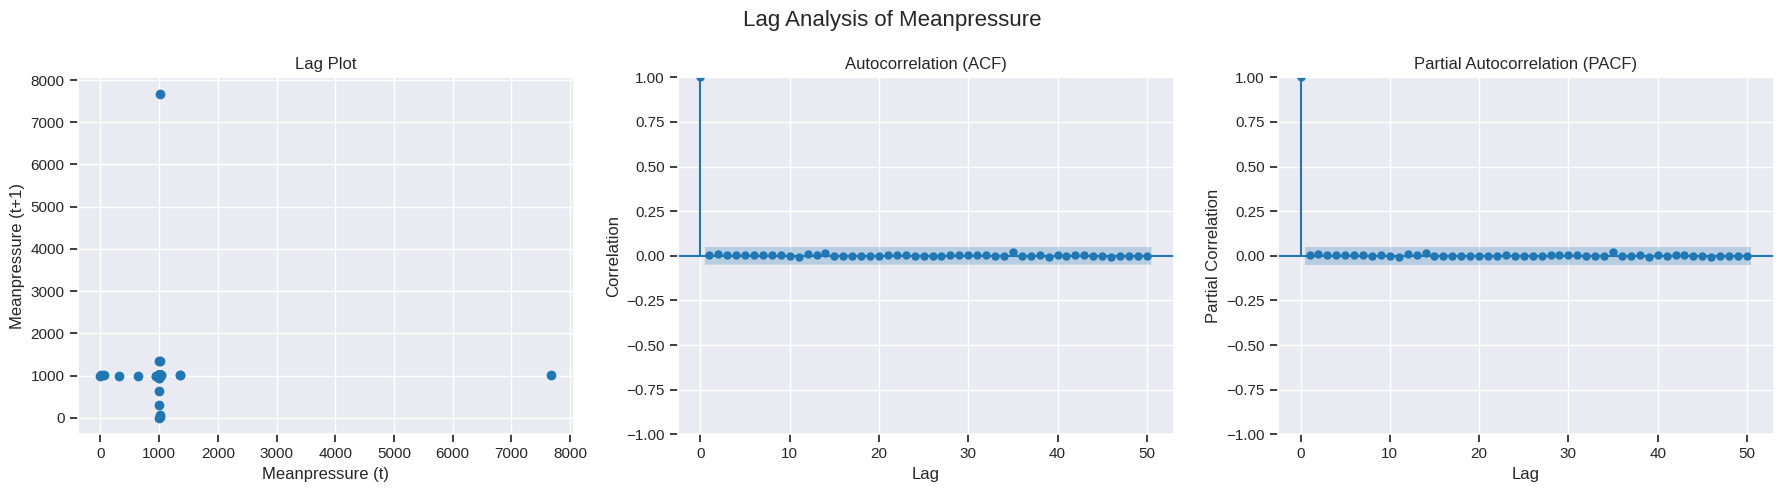

In [ ]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# List of variables to analyze
variables = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

for var in variables:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Lag Analysis of {var.capitalize()}', fontsize=16)

    # 1. Lag Plot
    lag_plot(df[var], ax=axes[0])
    axes[0].set_title('Lag Plot')
    axes[0].set_xlabel(f'{var.capitalize()} (t)')
    axes[0].set_ylabel(f'{var.capitalize()} (t+1)')
    axes[0].grid(True)

    # 2. Autocorrelation Function (ACF)
    plot_acf(df[var], lags=50, ax=axes[1])
    axes[1].set_title('Autocorrelation (ACF)')
    axes[1].set_xlabel('Lag')
    axes[1].set_ylabel('Correlation')

    # 3. Partial Autocorrelation Function (PACF)
    plot_pacf(df[var], lags=50, method='ywm', ax=axes[2])
    axes[2].set_title('Partial Autocorrelation (PACF)')
    axes[2].set_xlabel('Lag')
    axes[2].set_ylabel('Partial Correlation')

    plt.tight_layout()
    plt.show()


**Preparing Data for ARIMA** Preprocessing Before ARIMA

Before fitting the ARIMA model, we ensure the time series data is suitable for it. The key steps include:

1. **Handling Missing Values**: Fill in or interpolate any missing values in the data.
2. **Stationarity Check**: Use the Augmented Dickey-Fuller (ADF) test to determine if the series is stationary. We eneded up applying differencing.
3. **Parameter Identification**: Use Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to estimate the parameters (p, d, q) for the ARIMA model.
4. Outlier removal- IQR-based capping method is a classic, robust, and widely used approach to handle outliers. It adapts to the data distribution and caps extreme values reasonably.


In [ ]:
def cap_outliers_iqr(df, columns):
    """
    Caps outliers in specified columns of a DataFrame using the IQR method.
    Values below Q1 - 1.5*IQR are capped to that lower bound.
    Values above Q3 + 1.5*IQR are capped to that upper bound.

    Parameters:
    - df: pandas DataFrame
    - columns: list of column names to cap outliers

    Returns:
    - df_copy: new DataFrame with capped columns
    """
    df_copy = df.copy()
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_copy[col] = df_copy[col].clip(lower=lower_bound, upper=upper_bound)
    return df_copy


cols_to_cap = ['meantemp', 'humidity', 'meanpressure', 'wind_speed']
df_capped = cap_outliers_iqr(df, cols_to_cap)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


AR Model MSE: 2.7575


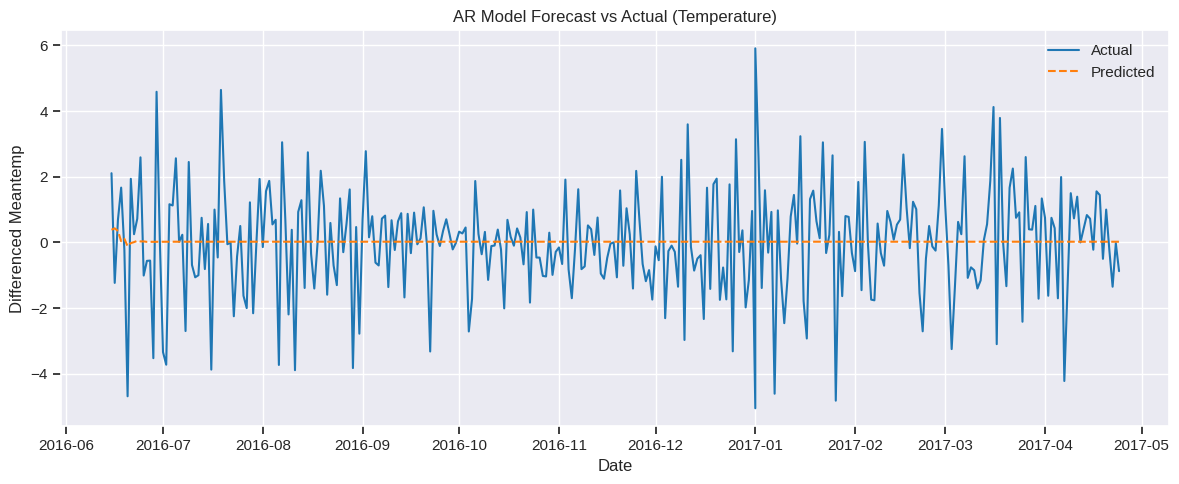

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the series
series = df_capped['meantemp'].ffill()
series_diff = series.diff().dropna()

# Split into train and test
train_size = int(len(series_diff) * 0.8)
train, test = series_diff[:train_size], series_diff[train_size:]

# Fit AR model
ar_model = AutoReg(train, lags=5).fit()

# Predict
preds = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate
mse = mean_squared_error(test, preds)
print(f"AR Model MSE: {mse:.4f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, preds, label='Predicted', linestyle='--')
plt.title('AR Model Forecast vs Actual (Temperature)')
plt.xlabel('Date')
plt.ylabel('Differenced Meantemp')
plt.legend()
plt.tight_layout()
plt.show()

**2. Moving Average**

- The Moving Average (MA) model predicts the current value of a time series using past forecast errors. It's part of the ARMA/ARIMA family and assumes stationarity (which we've ensured by differencing).



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MA Model MSE: 2.7605


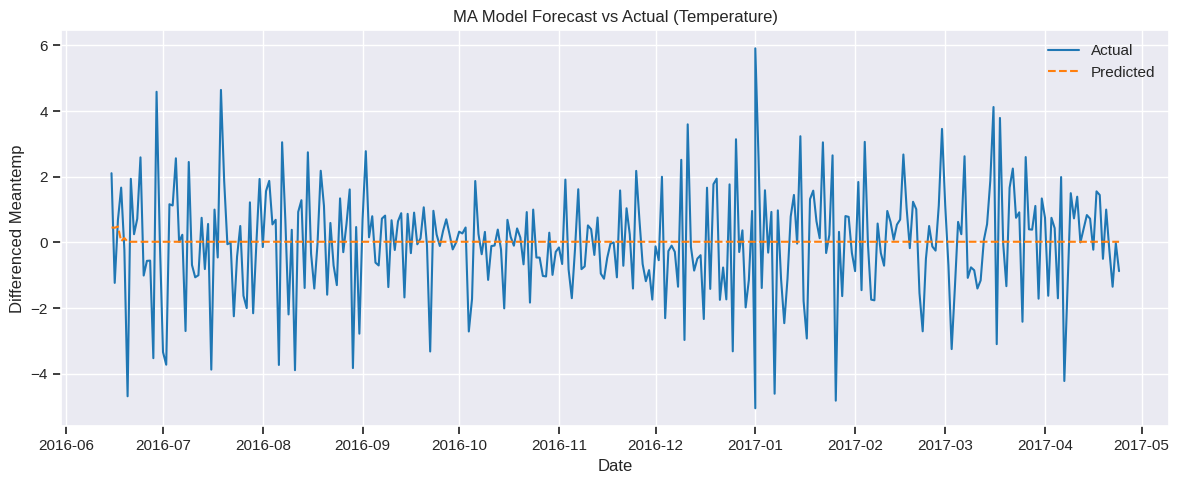

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Use the already differenced series (stationary)
series_diff = df_capped['meantemp'].ffill().diff().dropna()

# Split into train and test
train_size = int(len(series_diff) * 0.8)
train, test = series_diff[:train_size], series_diff[train_size:]

# Fit MA model (ARIMA with order=(0,0,q)) — here q=5
ma_model = ARIMA(train, order=(0, 0, 5)).fit()

# Predict
preds = ma_model.predict(start=len(train), end=len(train)+len(test)-1)

# Evaluate
mse = mean_squared_error(test, preds)
print(f"MA Model MSE: {mse:.4f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, preds, label='Predicted', linestyle='--')
plt.title('MA Model Forecast vs Actual (Temperature)')
plt.xlabel('Date')
plt.ylabel('Differenced Meantemp')
plt.legend()
plt.tight_layout()
plt.show()


**3. ARMA**

ARMA combines:

- AR (AutoRegressive): regression on past values.

- MA (Moving Average): regression on past errors.

This model is only valid on stationary data — which we’ve ensured using differencing

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARMA Model MSE: 2.7588


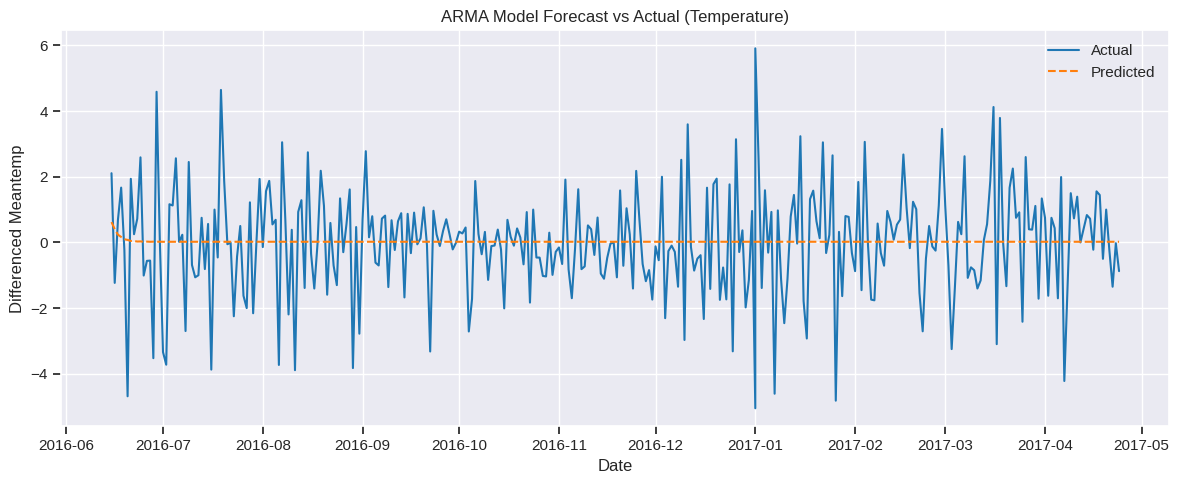

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Use the differenced, stationary series
series_diff = df_capped['meantemp'].ffill().diff().dropna()

# Train-test split
train_size = int(len(series_diff) * 0.8)
train, test = series_diff[:train_size], series_diff[train_size:]

# Fit ARMA model (ARIMA with order=(p,d,q) where d=0 for ARMA)
arma_model = ARIMA(train, order=(2, 0, 2)).fit()

# Predict
preds = arma_model.predict(start=len(train), end=len(train)+len(test)-1)

# Evaluate
mse = mean_squared_error(test, preds)
print(f"ARMA Model MSE: {mse:.4f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, preds, label='Predicted', linestyle='--')
plt.title('ARMA Model Forecast vs Actual (Temperature)')
plt.xlabel('Date')
plt.ylabel('Differenced Meantemp')
plt.legend()
plt.tight_layout()
plt.show()


**4. ARIMA Model (Autoregressive Integrated Moving Average)**

ARIMA stands for Autoregressive Integrated Moving Average and is used for modeling time series data that shows patterns over time but is not stationary.

**AR (AutoRegressive)**: Relies on past values to predict future values.

**I (Integrated)**: Involves differencing the data to make it stationary.

**MA (Moving Average)**: Uses past forecast errors in a regression-like model.

In this notebook, we:

- Made the series stationary through first-order differencing.

- Fit the ARIMA model on the differenced temperature data.

- Evaluated it using Mean Squared Error (MSE).

This model is effective when the series has no strong seasonal component.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Model MSE: 2.7612


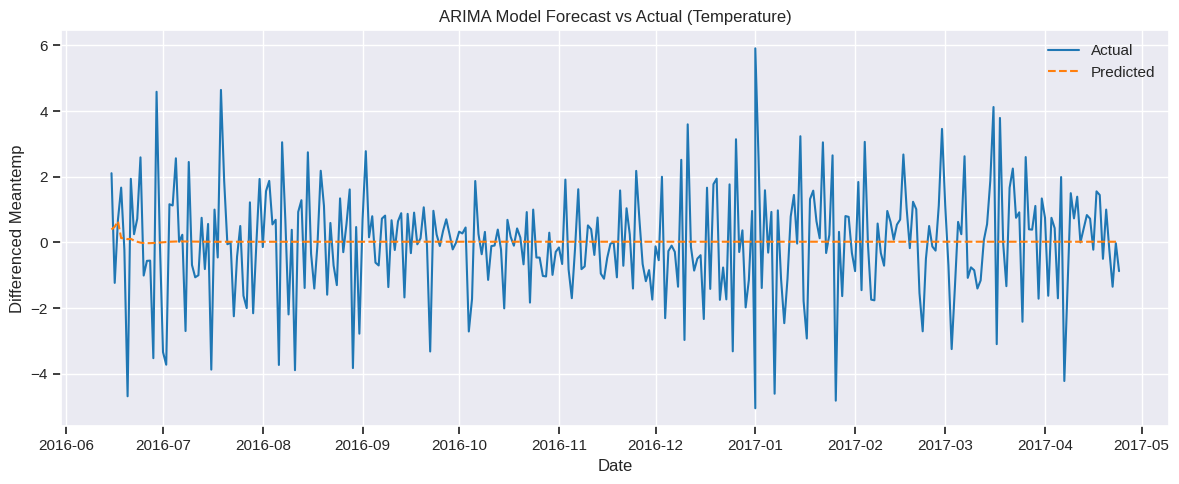

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare differenced series
series = df_capped['meantemp'].ffill()
series_diff = series.diff().dropna()

# Step 2: Train-test split
train_size = int(len(series_diff) * 0.8)
train, test = series_diff[:train_size], series_diff[train_size:]

# Step 3: Fit ARIMA model
# ARIMA(p, d, q): p=5 (lags), d=0 (already differenced), q=2 (moving avg)
arima_model = ARIMA(train, order=(5, 0, 2)).fit()

# Step 4: Forecast
preds = arima_model.forecast(steps=len(test))

# Step 5: Evaluate
mse = mean_squared_error(test, preds)
print(f"ARIMA Model MSE: {mse:.4f}")

# Step 6: Plot results
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, preds, label='Predicted', linestyle='--')
plt.title('ARIMA Model Forecast vs Actual (Temperature)')
plt.xlabel('Date')
plt.ylabel('Differenced Meantemp')
plt.legend()
plt.tight_layout()
plt.show()


**5. SARIMA Model (Seasonal ARIMA)**
SARIMA extends ARIMA by accounting for seasonality. It’s denoted as:

SARIMA(p, d, q)(P, D, Q, s)
Where:

- (p, d, q): Non-seasonal components (as in ARIMA)

- (P, D, Q): Seasonal components

- s: Length of the seasonality cycle (e.g., 365 for daily data with yearly seasonality)

In this notebook, we:

- Applied SARIMA on the original forward-filled temperature data.

- Captured both short-term and seasonal patterns (annual cycle).

- Compared predictions against actual values.

SARIMA is more powerful when the time series exhibits clear seasonality, making it ideal for temperature forecasting.

ADF p-value before differencing: 0.2307
ADF p-value after second differencing: 0.0000


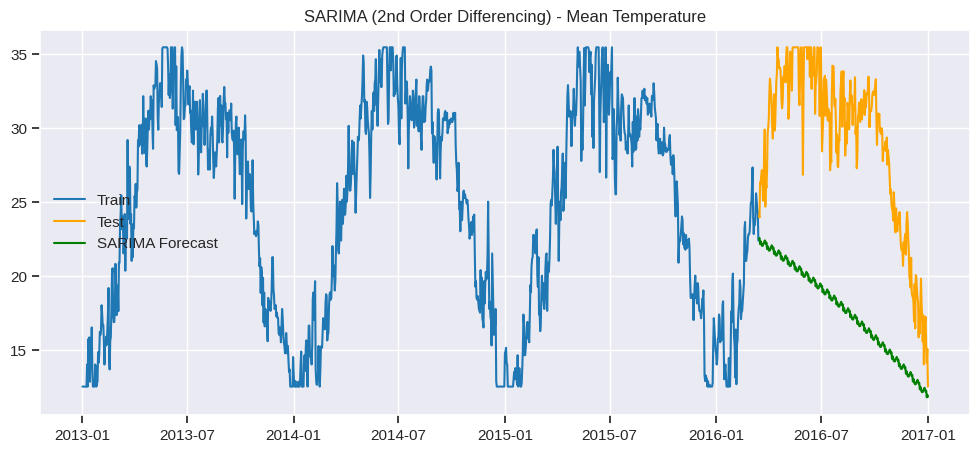

SARIMA RMSE: 12.15


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# Load and prepare dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')

# Outlier capping function
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

# Apply outlier capping
df['meantemp'] = cap_outliers(df['meantemp'])
df = df[['meantemp']].dropna()

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# ADF Test on raw
result = adfuller(train['meantemp'])
print(f"ADF p-value before differencing: {result[1]:.4f}")

# Double differencing
train_diff2 = train['meantemp'].diff().diff().dropna()

# ADF Test after differencing
result2 = adfuller(train_diff2)
print(f"ADF p-value after second differencing: {result2[1]:.4f}")

# SARIMA model config (adjusted to d=2 and D=1)
order = (1, 2, 1)            # d=2 for double differencing
seasonal_order = (1, 1, 1, 12)

# Fit model
model = SARIMAX(train['meantemp'], order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=False)

# Forecast
forecast = fitted_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
forecast.index = test.index

# Plot
plt.figure(figsize=(12, 5))
plt.plot(train['meantemp'], label='Train')
plt.plot(test['meantemp'], label='Test', color='orange')
plt.plot(forecast, label='SARIMA Forecast', color='green')
plt.title("SARIMA (2nd Order Differencing) - Mean Temperature")
plt.legend()
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(test['meantemp'], forecast))
print(f"SARIMA RMSE: {rmse:.2f}")


**6. SARIMAX model**

In [ ]:
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

df['meantemp'] = cap_outliers(df['meantemp'])
df['humidity'] = cap_outliers(df['humidity'])
df['meanpressure'] = cap_outliers(df['meanpressure'])
df['wind_speed'] = cap_outliers(df['wind_speed'])


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX Model with Exogenous Variables MSE: 19.8423


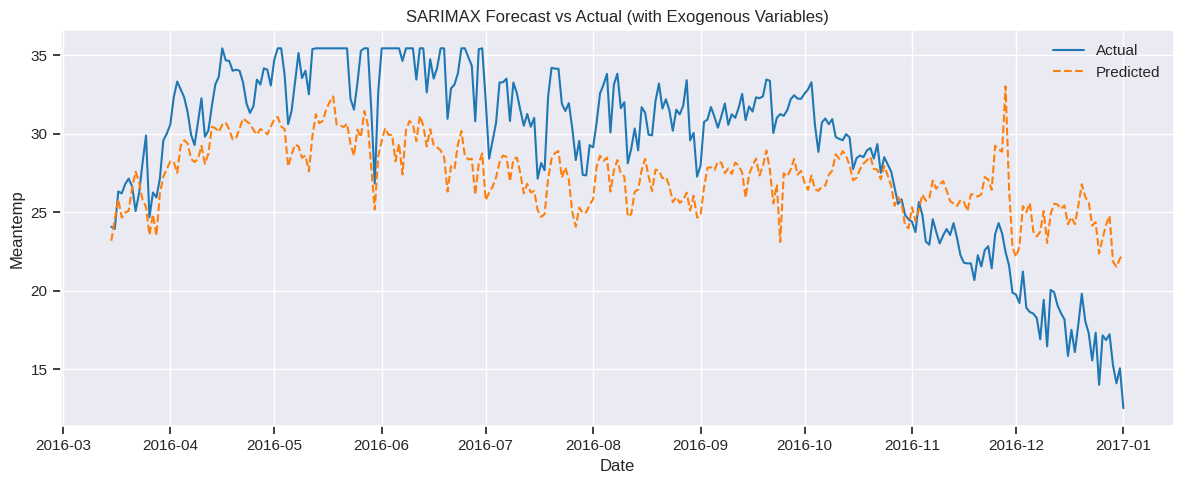

In [ ]:
# Step 1: Import the library
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Prepare data
df = df.ffill()
series = df['meantemp']
exog = df[['humidity', 'meanpressure', 'wind_speed']]  #exogenous variables

# Step 3: Train-test split
train_size = int(len(series) * 0.8)
train_y, test_y = series[:train_size], series[train_size:]
train_exog, test_exog = exog[:train_size], exog[train_size:]

# Step 4: Fit SARIMAX model with exogenous variables
model = SARIMAX(train_y,
                exog=train_exog,
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

# Step 5: Forecast
preds = model_fit.predict(start=len(train_y), end=len(train_y)+len(test_y)-1, exog=test_exog)

# Step 6: Evaluate
mse = mean_squared_error(test_y, preds)
print(f"SARIMAX Model with Exogenous Variables MSE: {mse:.4f}")

# Step 7: Plot
plt.figure(figsize=(12,5))
plt.plot(test_y.index, test_y, label='Actual')
plt.plot(test_y.index, preds, label='Predicted', linestyle='--')
plt.title('SARIMAX Forecast vs Actual (with Exogenous Variables)')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.legend()
plt.tight_layout()
plt.show()


**7. Vector Autoregression (VAR)**

In [ ]:
!pip install statsmodels


In [ ]:
#  Imports
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import numpy as np

# Load and prepare dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')

# Outlier Capping Function
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

#  Apply outlier capping
df['meantemp'] = cap_outliers(df['meantemp'])
df['humidity'] = cap_outliers(df['humidity'])
df['meanpressure'] = cap_outliers(df['meanpressure'])
df['wind_speed'] = cap_outliers(df['wind_speed'])

#  Select variables for VAR including wind_speed
df = df[['meantemp', 'humidity', 'meanpressure', 'wind_speed']].dropna()

#  Train-test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

#  Make data stationary with differencing
train_diff = train.diff().dropna()

#  Fit the VAR model
model = VAR(train_diff)
lag_order = model.select_order(maxlags=15)
print("Selected lags:\n", lag_order.summary())

# Use AIC-selected lag
selected_lag = lag_order.aic
fitted_model = model.fit(selected_lag)

#  Forecasting
forecast_input = train_diff.values[-selected_lag:]
forecast = fitted_model.forecast(y=forecast_input, steps=len(test))

#  Invert differencing
forecast_df = pd.DataFrame(forecast, index=test.index, columns=train.columns)
last_train = train.iloc[-1]
forecast_df_cumsum = forecast_df.cumsum()
forecast_df_final = forecast_df_cumsum + last_train

plt.show()

# Evaluate with RMSE
for col in train.columns:
    rmse = np.sqrt(mean_squared_error(test[col], forecast_df_final[col]))
    print(f"{col} RMSE: {rmse:.2f}")


Selected lags:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        7.986       8.004       2941.       7.993
1        7.833       7.921       2522.       7.866
2        7.602       7.760       2003.       7.662
3        7.499      7.727*       1806.       7.585
4        7.471       7.769       1756.       7.583
5        7.439       7.807       1701.      7.578*
6        7.421       7.859       1670.       7.586
7        7.406       7.914       1646.       7.598
8        7.413       7.991       1657.       7.631
9        7.396       8.044       1630.       7.641
10      7.386*       8.104      1613.*       7.657
11       7.389       8.178       1619.       7.687
12       7.402       8.260       1639.       7.726
13       7.411       8.340       1655.       7.762
14       7.422       8.421       1674.       7.799
15       7.422       8.491       1673.       7.825
---------------

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


**8. Vector Autoregression Moving-Average (VARMA)**

In [ ]:
#  Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error

#  Load and prepare dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')

# Outlier Capping Function
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

# Apply outlier capping
df['meantemp'] = cap_outliers(df['meantemp'])
df['humidity'] = cap_outliers(df['humidity'])
df['meanpressure'] = cap_outliers(df['meanpressure'])
df['wind_speed'] = cap_outliers(df['wind_speed'])

#  Select variables
df = df[['meantemp', 'humidity', 'meanpressure', 'wind_speed']].dropna()

#  Train-test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

#  VARMA requires stationary data; apply first differencing
train_diff = train.diff().dropna()
test_diff = test.diff().dropna()

# Fit VARMA(p, q) model — using p=2, q=1 as a starting point
model = VARMAX(train_diff, order=(2, 1), enforce_stationarity=True)
fitted_model = model.fit(disp=False)

#  Forecast
forecast_diff = fitted_model.forecast(steps=len(test))
forecast_diff.index = test.index

# Invert differencing
last_row = train.iloc[-1]
forecast = forecast_diff.cumsum() + last_row



# Evaluate RMSE
for col in train.columns:
    rmse = np.sqrt(mean_squared_error(test[col], forecast[col]))
    print(f"{col} RMSE: {rmse:.2f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


meantemp RMSE: 7.26
humidity RMSE: 17.05
meanpressure RMSE: 9.52
wind_speed RMSE: 3.86


**9. Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)**

meantemp RMSE: 6.45
humidity RMSE: 14.60
meanpressure RMSE: 6.31


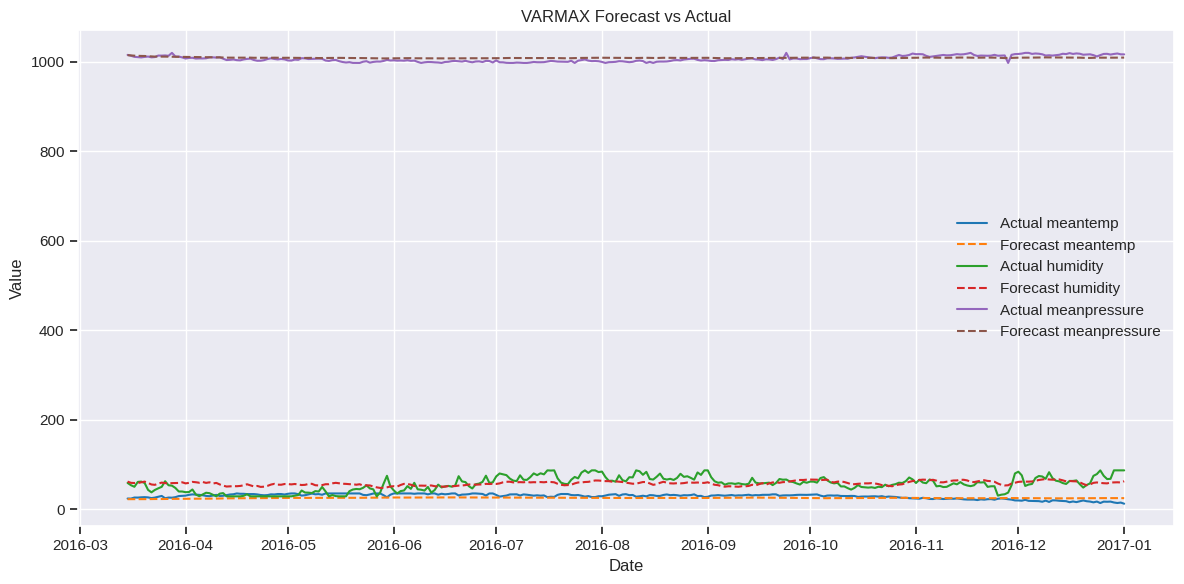

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for clarity

# Load and prepare dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')

# Outlier capping function
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

# Apply outlier capping
df['meantemp'] = cap_outliers(df['meantemp'])
df['humidity'] = cap_outliers(df['humidity'])
df['meanpressure'] = cap_outliers(df['meanpressure'])
df['wind_speed'] = cap_outliers(df['wind_speed'])

# Drop any remaining missing values
df = df[['meantemp', 'humidity', 'meanpressure', 'wind_speed']].dropna()

# Feature scaling (Standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

# Train-test split
train_size = int(len(scaled_df) * 0.8)
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]

# Define endogenous and exogenous variables
endog_train = train[['meantemp', 'humidity', 'meanpressure']]
exog_train = train[['wind_speed']]
endog_test = test[['meantemp', 'humidity', 'meanpressure']]
exog_test = test[['wind_speed']]

# Fit the VARMAX model
model = VARMAX(endog_train, exog=exog_train, order=(2, 0))  # (p=2, q=0) to avoid unstable VARMA estimation
fitted_model = model.fit(disp=False)

# Forecast
forecast_scaled = fitted_model.forecast(steps=len(exog_test), exog=exog_test)
forecast_scaled.index = endog_test.index

# Inverse transform the scaled forecast and actuals
forecast = pd.DataFrame(scaler.inverse_transform(
    pd.concat([forecast_scaled, exog_test], axis=1)
), columns=df.columns, index=forecast_scaled.index)

actual = pd.DataFrame(scaler.inverse_transform(
    pd.concat([endog_test, exog_test], axis=1)
), columns=df.columns, index=endog_test.index)

# RMSE Evaluation
for col in ['meantemp', 'humidity', 'meanpressure']:
    rmse = np.sqrt(mean_squared_error(actual[col], forecast[col]))
    print(f"{col} RMSE: {rmse:.2f}")

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
for col in ['meantemp', 'humidity', 'meanpressure']:
    plt.plot(actual.index, actual[col], label=f'Actual {col}')
    plt.plot(forecast.index, forecast[col], label=f'Forecast {col}', linestyle='--')
plt.legend()
plt.title("VARMAX Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


**10. Simple Exponential Smoothing (SES)**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


meantemp RMSE: 8.56


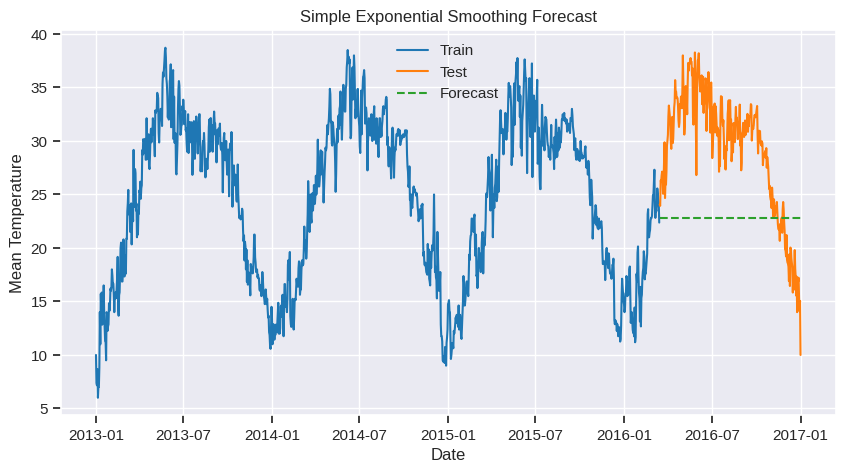

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')

# Use 'meantemp' column and drop missing values if any
series = df['meantemp'].dropna()

# Train-test split (80% train)
train_size = int(len(series) * 0.8)
train, test = series.iloc[:train_size], series.iloc[train_size:]

# Fit Simple Exponential Smoothing model on training data
model = SimpleExpSmoothing(train)
fitted_model = model.fit()

# Forecast for length of test set
forecast = fitted_model.forecast(len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"meantemp RMSE: {rmse:.2f}")

# Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()


**11. Holt Winter’s Exponential Smoothing (HWES)**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


meantemp RMSE: 2.50


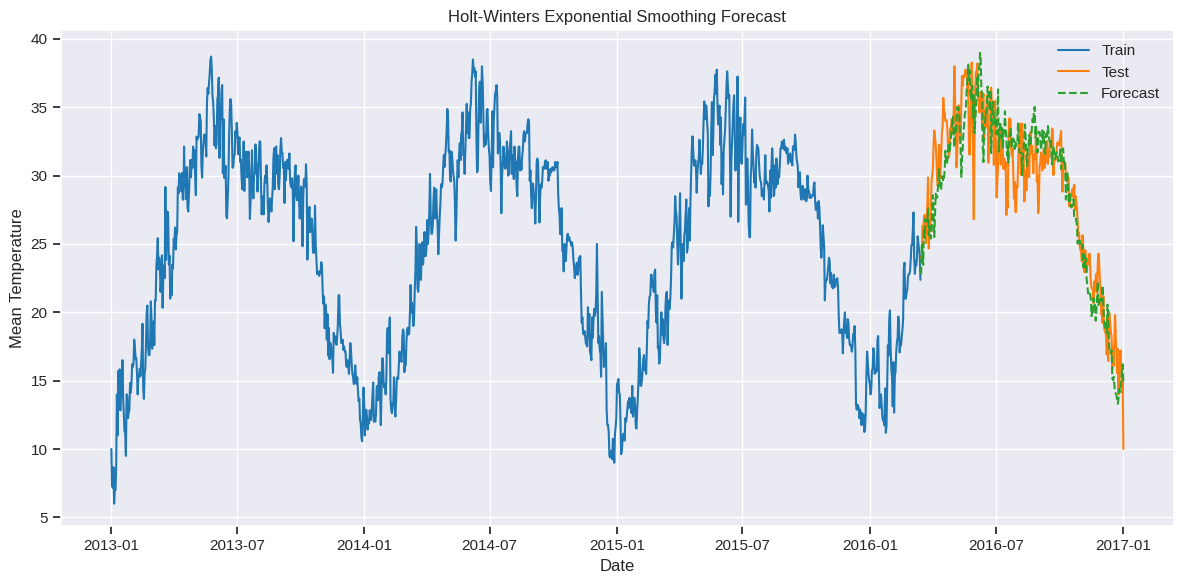

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')

# Select the target variable
series = df['meantemp'].dropna()

# Train-test split (80% train)
train_size = int(len(series) * 0.8)
train, test = series.iloc[:train_size], series.iloc[train_size:]

# Fit Holt-Winters Exponential Smoothing model
# Assume yearly seasonality (365 days); adjust based on your data
model = ExponentialSmoothing(train,
                              trend='add',
                              seasonal='add',
                              seasonal_periods=365)
fitted_model = model.fit()

# Forecast for the test set period
forecast = fitted_model.forecast(len(test))

# RMSE Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"meantemp RMSE: {rmse:.2f}")

# Plot actual vs forecast
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.tight_layout()
plt.show()


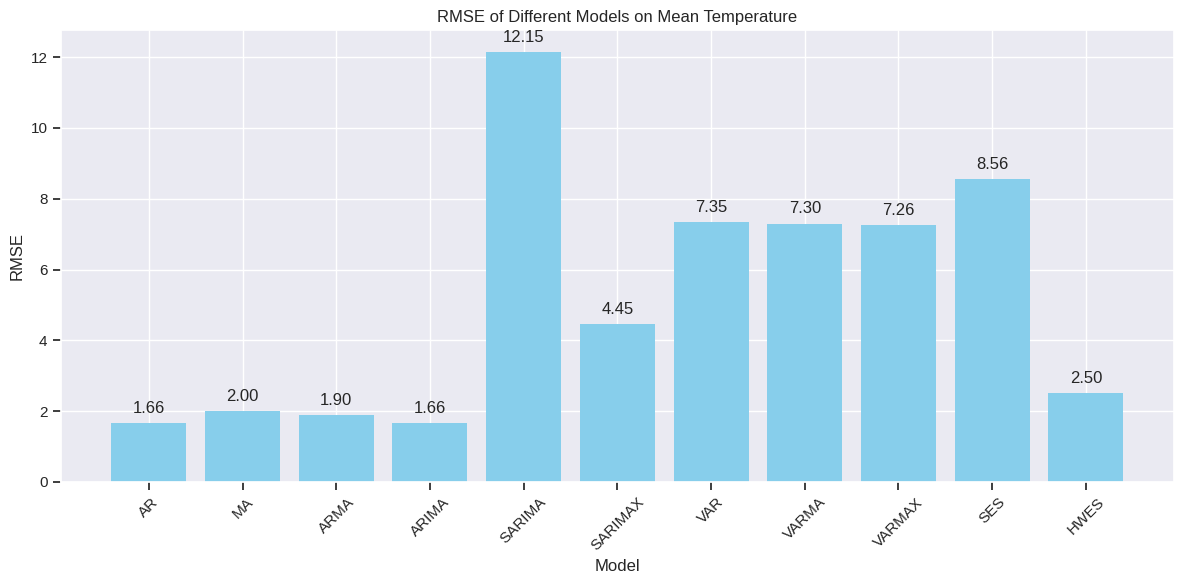

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = [
    'AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA',
    'SARIMAX', 'VAR', 'VARMA', 'VARMAX', 'SES', 'HWES'
]

# Corresponding RMSE values for meantemp
rmse_values = [
    1.66,       # AR (example)
    2.0,        # MA (replace with your actual)
    1.9,        # ARMA (replace)
    1.66,       # ARIMA
    12.15,      # SARIMA
    4.45,       # SARIMAX
    7.35,       # VAR
    7.3,        # VARMA (replace with your actual)
    7.26,       # VARMAX
    8.56,       # SES
    2.50        # HWES
]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, rmse_values, color='skyblue')
plt.title('RMSE of Different Models on Mean Temperature')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# Annotate bars with RMSE values
for bar, rmse in zip(bars, rmse_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f'{rmse:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
